In [1]:
#imports
import pandas as pd
import numpy as np

#csv -> dataframe
species_df = pd.read_csv('species.csv', dtype = str)
parks_df = pd.read_csv('parks.csv')

species_df.head()
#Note: not sure why there is a 14th data column showing-there are only 13 columns of data-this is confirmed
#in the documentation for the dataset. Will come back and drop that.

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [2]:
#drop that extra column in species_df
species_df = species_df.iloc[: , :-1]
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


In [3]:
#sort entries into animals, plants (+ fungi)

plant_animal_boolean_list = []
for entry in species_df['Category']:
    if entry == 'Vascular Plant' or  entry =='Fungi' or entry =='Nonvascular Plant' or entry =='Algae':
        plant_animal = 0
        plant_animal_boolean_list.append(plant_animal)
    else:
        plant_animal = 1
        plant_animal_boolean_list.append(plant_animal)

species_df['plant_animal'] = plant_animal_boolean_list

In [4]:
#check for new column
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,plant_animal
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,0
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,0
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,0
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,0


In [5]:
#entries where "Record Status" is a Common Name clearly have errors
#entries with "In Review" record status are missing data in some fields,
#may not be as reliable as "Approved" entries
#BUT they make up a substantial portion of the dataset - let's try keeping them in

species_df = species_df[species_df['Record Status'].isin(["Approved", "In Review"])]
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,plant_animal
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,0
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,0
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,0
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,0


In [6]:
#this data is primarily text
#so we will need to do some label encoding before we can create and train data models

#label encode Park Name
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

def LabelEncode (df):
    for col in df:
        df[col] = class_labels.fit_transform(df[col].values)

In [7]:
#label encode species dataframe
LabelEncode(species_df)
species_df

<ipython-input-6-80ab2d7ab1d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = class_labels.fit_transform(df[col].values)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,plant_animal
0,0,0,8,41,417,1130,20527,0,4,0,3,12,8,1
1,1,0,8,41,417,29730,22166,0,4,0,0,20,8,1
2,2,0,8,87,352,7202,8773,0,4,1,1,20,5,1
3,3,0,8,87,352,7204,11183,0,0,0,6,20,0,1
4,4,0,8,87,352,45436,3332,0,4,2,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,119186,55,13,474,2012,40595,9304,0,4,0,4,20,8,0
119244,119187,55,13,546,2301,45396,6190,0,4,0,4,20,8,0
119245,119188,55,13,546,2301,45411,34671,0,4,1,4,20,8,0
119246,119189,55,13,553,2331,23324,8952,0,4,0,3,20,8,0


In [8]:
#scientific names should be unique - each entry already has unique identifier in "Species ID"
#common names are useful for humans but may just muddy the waters for machine learning/modeling

species_df_filtered = species_df.drop(labels = ["Scientific Name", "Common Names"], axis = 1)

species_df_filtered.head()

,Species ID,Park Name,Category,Order,Family,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,plant_animal
0,0,0,8,41,417,0,4,0,3,12,8,1
1,1,0,8,41,417,0,4,0,0,20,8,1
2,2,0,8,87,352,0,4,1,1,20,5,1
3,3,0,8,87,352,0,0,0,6,20,0,1
4,4,0,8,87,352,0,4,2,1,0,8,1


In [9]:
#check data types - see if our label encoding behaved
species_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119191 entries, 0 to 119247
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Species ID           119191 non-null  int64
 1   Park Name            119191 non-null  int64
 2   Category             119191 non-null  int64
 3   Order                119191 non-null  int64
 4   Family               119191 non-null  int64
 5   Record Status        119191 non-null  int64
 6   Occurrence           119191 non-null  int64
 7   Nativeness           119191 non-null  int64
 8   Abundance            119191 non-null  int64
 9   Seasonality          119191 non-null  int64
 10  Conservation Status  119191 non-null  int64
 11  plant_animal         119191 non-null  int64
dtypes: int64(12)
memory usage: 11.8 MB


In [10]:
#modeling to predict "Plant or Animal"
#import train_test_split
from sklearn.model_selection import train_test_split

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
#set up Logistic Regression model
from sklearn.linear_model import LogisticRegression

regression_pa = LogisticRegression()
regression_pa.fit(X_train, y_train)

LogisticRegression()

In [13]:
#check performance of regression model
regression_pa.fit(X_train, y_train)
y_pred = regression_pa.predict(X_test)
regression_pa.score(X_test, y_test)

0.8958429464323168

In [22]:
#import MSE - check RMSE
from sklearn.metrics import mean_squared_error as MSE

rmse_log_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_log_pa)

0.3227337192914357


In [14]:
print(y_test)

5331      0
21858     1
49530     1
115695    1
9786      0
         ..
24896     1
68969     1
114213    1
50029     1
87829     1
Name: plant_animal, Length: 23839, dtype: int64


In [15]:
print(y_pred)

[0 1 1 ... 0 1 1]


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm

array([[13948,  1380],
       [ 1103,  7408]])

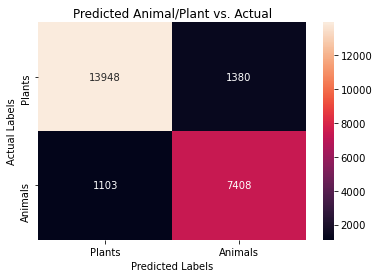

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Predicted Animal/Plant vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

ax.xaxis.set_ticklabels(['Plants', 'Animals'])
ax.yaxis.set_ticklabels(['Plants', 'Animals'])

plt.show()

In [23]:
#pretty good results!  let's try other modeling methods

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
dt_pa = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pa.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred = dt_pa.predict(X_test)

dt_pa_score = accuracy_score(y_test, y_pred)
print(dt_pa_score)

0.9983640253366333


In [27]:
cm_dt_pa = confusion_matrix(y_test, y_pred)
cm_dt_pa

array([[15328,     0],
       [   39,  8472]])

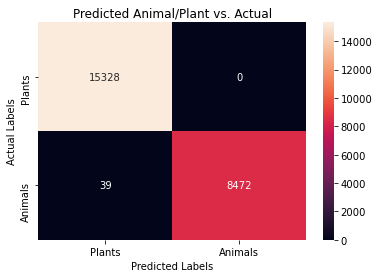

In [28]:
ax = sns.heatmap(cm_dt_pa, annot=True, fmt='g')
ax.set_title('Predicted Animal/Plant vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

ax.xaxis.set_ticklabels(['Plants', 'Animals'])
ax.yaxis.set_ticklabels(['Plants', 'Animals'])

plt.show()

In [29]:
#check rmse
rmse_dt_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_dt_pa)

0.04044718362712974


In [35]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#set seed
SEED = 42

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
rf_pa = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.1, random_state = SEED)
rf_pa.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.1, n_estimators=400, random_state=42)

In [43]:
y_pred = rf_pa.predict(X_test)

rmse_rf_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_rf_pa)

0.25329241565213434


In [44]:
#neural network imports
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

number_features = X_train.shape[1]

In [45]:
#defining the model
model_pa = Sequential()
model_pa.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(number_features,)))
model_pa.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model_pa.add(Dense(2, activation='softmax'))

In [46]:
#compile model
model_pa.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
#run Abundance neural network model
model_pa.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
954/954 - 2s - loss: 0.1357 - accuracy: 0.9389
Epoch 2/100
954/954 - 1s - loss: 0.0877 - accuracy: 0.9654
Epoch 3/100
954/954 - 1s - loss: 0.0685 - accuracy: 0.9746
Epoch 4/100
954/954 - 1s - loss: 0.0527 - accuracy: 0.9815
Epoch 5/100
954/954 - 1s - loss: 0.0395 - accuracy: 0.9875
Epoch 6/100
954/954 - 1s - loss: 0.0282 - accuracy: 0.9918
Epoch 7/100
954/954 - 1s - loss: 0.0209 - accuracy: 0.9945
Epoch 8/100
954/954 - 1s - loss: 0.0155 - accuracy: 0.9964
Epoch 9/100
954/954 - 1s - loss: 0.0112 - accuracy: 0.9975
Epoch 10/100
954/954 - 1s - loss: 0.0097 - accuracy: 0.9976
Epoch 11/100
954/954 - 1s - loss: 0.0072 - accuracy: 0.9983
Epoch 12/100
954/954 - 1s - loss: 0.0057 - accuracy: 0.9987
Epoch 13/100
954/954 - 1s - loss: 0.0045 - accuracy: 0.9990
Epoch 14/100
954/954 - 3s - loss: 0.0037 - accuracy: 0.9992
Epoch 15/100
954/954 - 2s - loss: 0.0038 - accuracy: 0.9991
Epoch 16/100
954/954 - 1s - loss: 0.0030 - accuracy: 0.9993
Epoch 17/100
954/954 - 1s - loss: 0.0019 - accura

Can't get much better performance than this!  Makes sense, as binary classification is the simplest kind of classification problem, and should be the easiest for our model algorithms to figure out.